# Проект: Исследование стартапов


## Введение

### **Цель проекта:**  
Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.
### **Задачи проекта:**  

**1. По каким столбцам можно объединять данные из разных таблиц;**

**2. Можно ли доверять данным о сотрудниках стартапов и их образовании;**

**3. Что означают покупки за 0 или за 1 доллар;**

**4. Какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;**

**5. Как рассчитать и отобразить численные показатели и динамику.**

### Описание данных

**Таблица** `acquisition` (Сделки приобретения)

| Поле | Описание |
|------|----------|
| `id` | Уникальный идентификатор сделки |
| `acquiring_company_id` | ID компании-покупателя |
| `acquired_company_id` | ID приобретаемой компании |
| `term_code` | Условия расчета по сделке |
| `price_amount` | Сумма сделки |
| `acquired_at` | Дата совершения сделки |

**Таблица** `company_and_rounds` (Компании и раунды финансирования)

| Поле | Описание |
|------|----------|
| `company ID` | Уникальный ID компании |
| `name` | Название компании |
| `category code` | Категория деятельности |
| `status` | Статус компании |
| `founded at` | Дата основания |
| `closed at` | Дата закрытия |
| `domain` | Домен компании |
| `network username` | Ник в соцсетях |
| `country code` | Код страны |
| `investment rounds` | Число инвестиционных раундов |
| `funding rounds` | Число раундов финансирования |
| `funding total` | Общий объем финансирования |
| `milestones` | Вехи развития |
| `funding round id` | ID раунда финансирования |
| `company id` | ID компании |
| `funded at` | Дата финансирования |
| `funding round type` | Тип раунда |
| `raised amount` | Сумма финансирования |
| `pre money valuation` | Предварительная оценка |
| `participants` | Количество участников |
| `is first round` | Первый раунд? |
| `is last round` | Последний раунд? |

**Таблица** `education` (Образование сотрудников)

| Поле | Описание |
|------|----------|
| `id` | ID записи |
| `person_id` | ID сотрудника |
| `instituition` | Учебное заведение |
| `graduated_at` | Дата окончания |

**Таблица** `people` (Сотрудники)

| Поле | Описание |
|------|----------|
| `id` | ID сотрудника |
| `first_name` | Имя |
| `last_name` | Фамилия |
| `company_id` | ID компании |
| `network_username` | Ник в соцсетях |

**Таблица** `degrees` (Образовательные степени)

| Поле | Описание |
|------|----------|
| `id` | ID записи |
| `object_id` | ID сотрудника |
| `degree_type` | Тип степени |
| `subject` | Специальность |

Опциональные датасеты:

**Таблица** `fund` (Инвестиционные фонды)

| Поле | Описание |
|------|----------|
| `id` | Уникальный идентификатор фонда |
| `name` | Название фонда |
| `category_code` | Сфера деятельности фонда |
| `founded_at` | Дата основания фонда |
| `domain` | Официальный сайт фонда |
| `network_username` | Ник фонда в социальных сетях |
| `country_code` | Страна регистрации фонда (код) |
| `investment_rounds` | Количество проведенных инвестиционных раундов |
| `invested_companies` | Количество профинансированных компаний |
| `milestones` | Ключевые вехи в истории фонда |

**Таблица** `investment` (Инвестиционные раунды)

| Поле | Описание |
|------|----------|
| `id` | Уникальный идентификатор записи |
| `funding_round_id` | Идентификатор раунда финансирования |
| `company_id` | Идентификатор компании-получателя |
| `funding_round_type` | Тип инвестиционного раунда |
| `fund_id` | Идентификатор фонда-инвестора |

### Содержание проекта

**1. Знакомство с данными**

**2. Предобработка данных**

**3. Исследовательский анализ данных**

**4. Итоговый вывод и рекомендации**


##  Знакомство с данными: загрузка и первичная предобработка



In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Выгружаем данные в переменные acquisition, company_and_rounds, people, education, degrees
acquisition = pd.read_csv('')
company_and_rounds = pd.read_csv('')
people = pd.read_csv('')
education = pd.read_csv('')
degrees = pd.read_csv('')

Познакомимся с данными датасетов и выведем первые строки методом head(), а информацию о датафрейме методом info():

In [3]:
# Выводим первые строки датафрейма acquisition на экран 
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
# Выводим информацию о датафрейме acquisition
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Названия в порядке, тип столбца `acquired_at` привести к дате, есть пропуски в столбцах `term_code` и `acquired_at`

In [5]:
# Выводим первые строки датафрейма company_and_rounds на экран 
company_and_rounds.head(10)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме company_and_rounds
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Пропуски абсолютно во всех столбцах, типы данных в некотрых столбцах можно оптимизировать, названия привести к `snakecase`

In [7]:
# Переименуем столбец дубликат
company_and_rounds = company_and_rounds.rename(columns={'company  id': 'company  identifier'})

In [8]:
# приводим названия к snakecase
# переводим буквы в нижний регистр и удаляем лишние пробелы
company_and_rounds.columns = company_and_rounds.columns.str.replace(r'\s+', '_', regex=True).str.lower()
company_and_rounds.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_identifier', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

In [9]:
# Выводим первые строки датафрейма company_and_rounds на экран 
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [10]:
# Выводим информацию о датафрейме company_and_rounds
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Много пропусков кроме одного столбца, названия в порядке, типы данных можно оптимизировать

In [11]:
# Выводим первые строки датафрейма education на экран 
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [12]:
# Выводим информацию о датафрейме education
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Названия в порядке, много пропусков в столбцах с датами, тип столбца `graduated_at` привести к дате

In [13]:
# Выводим первые строки датафрейма degrees на экран 
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [14]:
# Выводим информацию о датафрейме degrees
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Здесь все в порядке с названиями и типами, но также много пропусков

### 1.2. Смена типов и анализ пропусков



In [15]:
# преобразовываем типы данных для столбцов, которые хранят значения даты и времени
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], format='%Y-%m-%d')
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [16]:
# преобразовываем типы данных для столбцов, которые хранят значения даты и времени
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'], format='%Y-%m-%d')
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'], format='%Y-%m-%d')
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], format='%Y-%m-%d')
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [17]:
# преобразовываем типы данных для столбцов, которые хранят значения даты и времени
education['graduated_at'] = pd.to_datetime(education['graduated_at'], format='%Y-%m-%d')
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [18]:
acquisition.isna().sum()# Считаем пропуски в данных

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [19]:
acquisition.isna().mean()# Считаем долю пропусков

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

In [20]:
company_and_rounds.isna().sum()# Считаем пропуски в данных

company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_identifier     164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [21]:
company_and_rounds.isna().mean()# Считаем долю пропусков

company_id             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_identifier     0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

In [22]:
people.isna().sum()# Считаем пропуски в данных

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [23]:
people.isna().mean()# Считаем долю пропусков

id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

In [24]:
education.isna().sum()# Считаем пропуски в данных

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [25]:
education.isna().mean()# Считаем долю пропусков

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

In [26]:
degrees.isna().sum()# Считаем пропуски в данных

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [27]:
degrees.isna().mean()# Считаем долю пропусков

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

In [28]:
# Проверка данных на явные дубликаты
acquisition.duplicated().sum()

0

In [29]:
# Проверка данных на явные дубликаты
company_and_rounds.duplicated().sum()

0

In [30]:
# Проверка данных на явные дубликаты
people.duplicated().sum()

0

In [31]:
# Проверка данных на явные дубликаты
education.duplicated().sum()

0

In [32]:
# Проверка данных на явные дубликаты
degrees.duplicated().sum()

0

Типы данных были преобразованы где это необходимо. Дубликатов в данных нет.
Очень много пропусков, на мой взгляд данных достаточно чтобы получить хоть какие-нибудь результаты, но делать это аккуратно и внимательно, не упуская важных деталей. 

##  Предобработка данных, предварительное исследование

    funded_year  typical_amount_size  total_rounds
0        1999.0            2000000.0            76
1        2000.0            4200000.0           125
2        2001.0            3000000.0            96
3        2002.0            4200000.0           116
4        2003.0            3000000.0           159
5        2004.0            5000000.0           291
6        2005.0            5500000.0          1633
7        2006.0            5000000.0          2436
8        2007.0            3973320.0          3279
9        2008.0            3110000.0          3774
10       2009.0            2000000.0          4151
11       2010.0            1602500.0          6221
12       2011.0            1200000.0          9204
13       2012.0            1000000.0          9970
14       2013.0            1200000.0         11072


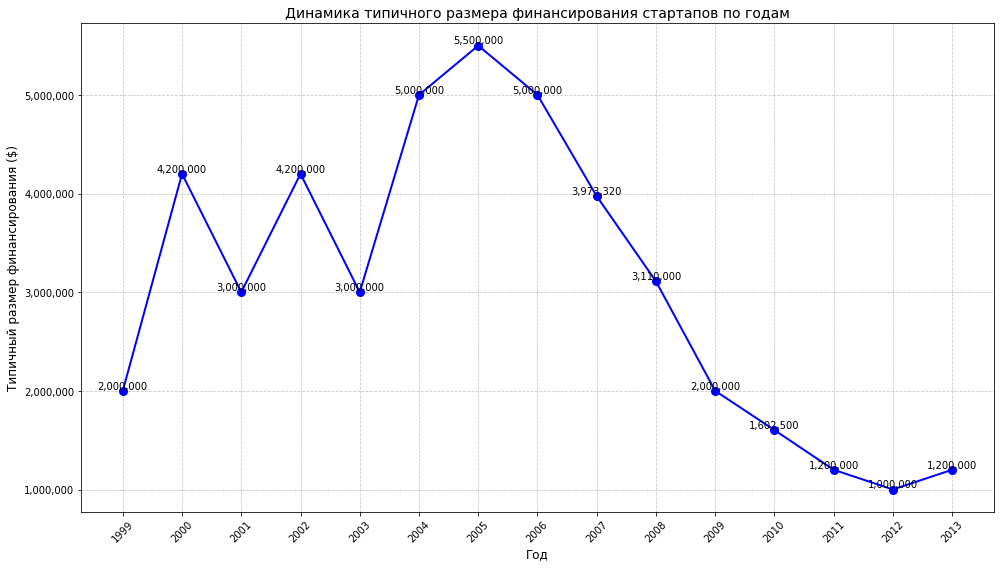

In [33]:
# присваиваем значение для предварительного исследования
pre_company_and_rounds = company_and_rounds.copy()

# выделяем год из даты финансирования
pre_company_and_rounds['funded_year'] = pre_company_and_rounds['funded_at'].dt.year

# Фильтрация данных - оставляем только годы с более чем 50 раундами
rounds_per_year = pre_company_and_rounds['funded_year'].value_counts().sort_index()# Считаем количество раундов по годам
valid_years = rounds_per_year[rounds_per_year > 50].index # Отсортировали по количеству раундов
df_filtered = pre_company_and_rounds[pre_company_and_rounds['funded_year'].isin(valid_years)]

# Создание сводной таблицы
pivot_table = df_filtered.groupby('funded_year').agg(
    typical_amount_size=('raised_amount', 'median'),  # Используем медиану как типичный размер
    total_rounds=('raised_amount', 'count')         # Считаем количество раундов
).reset_index()
print(pivot_table)

# Построение графика
plt.figure(figsize=(14, 8))

# График динамики типичного размера раунда
plt.plot(pivot_table['funded_year'], pivot_table['typical_amount_size'], 
         marker='o', linestyle='-', linewidth=2, markersize=8, color='blue')

# Настройки графика
plt.title('Динамика типичного размера финансирования стартапов по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Типичный размер финансирования ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Форматирование оси Y (добавляем разделители тысяч)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Добавление значений над точками
for x, y in zip(pivot_table['funded_year'], pivot_table['typical_amount_size']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=10)

# Настройка меток на оси X
plt.xticks(pivot_table['funded_year'], rotation=45)
plt.tight_layout()
plt.show()

Самое большое типичное финансирование на один раунд было в 2005 году и составляло 5500000.
В 2013 году наблюдалась тенденция увеличения количества раундов и уменьшение типичного финансирования за раунд.


### 2.2. Люди и их образование



In [34]:
# Соединяем два датасета по типу соединения outer
people_education = pd.merge(
    education,
    people,
    left_on='person_id',  # Столбец из таблицы education
    right_on='id',       # Соответствующий столбец из таблицы people
    how='outer'          # Тип соединения
)
# Добавляем флаг наличия информации об образовании
people_education['has_education'] = people_education['instituition'].notna()
people_education.head(10)


,id_x,person_id,instituition,graduated_at,id_y,first_name,last_name,company_id,network_username,has_education
0,1.0,6117.0,NaN,NaT,6117.0,Maurice,Rompre,2430.0,NaN,False
1,2.0,6136.0,"Washington University, St. Louis",1990-01-01,6136.0,John,Green,2454.0,NaN,True
2,3.0,6136.0,Boston University,1992-01-01,6136.0,John,Green,2454.0,NaN,True
3,4.0,6005.0,University of Greenwich,2006-01-01,6005.0,Sridhar,Gundaiah,2360.0,NaN,True
4,5.0,5832.0,Rice University,NaT,5832.0,David,Peters,2033.0,NaN,True
5,6.0,1017.0,Northeastern University,1988-01-01,1017.0,John,Furrier,300.0,furrier,True
6,20.0,1017.0,Babson College,1995-01-01,1017.0,John,Furrier,300.0,furrier,True
7,7.0,6176.0,Rochester Institute of Technology,2002-01-01,6176.0,Ian,Reardon,2473.0,NaN,True
8,2561.0,6176.0,Suffolk University Law School,2009-01-01,6176.0,Ian,Reardon,2473.0,NaN,True
9,8.0,5412.0,University of Cambridge,2002-01-01,5412.0,Dan,Birdwhistell,1956.0,NaN,True


count    22922.000000
mean         1.953974
std          4.087373
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        376.000000
Name: employee_count, dtype: float64


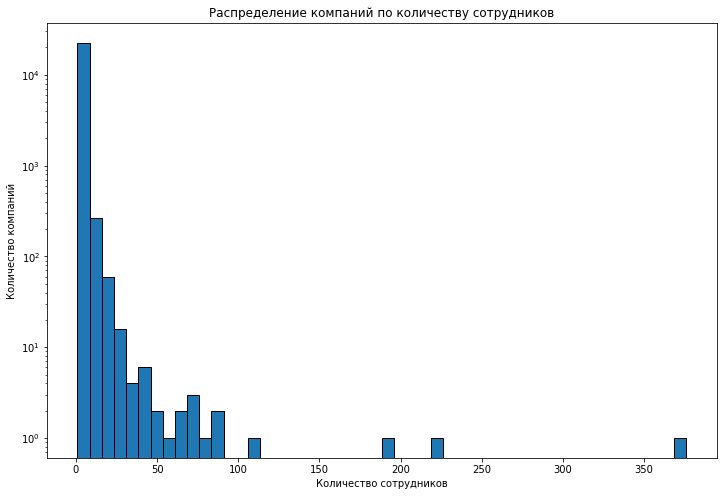

In [35]:
# Считаем количество сотрудников по компаниям
company_sizes = people_education['company_id'].value_counts().reset_index()
company_sizes.columns = ['company_id', 'employee_count']

# Анализируем распределение размеров компаний
print(company_sizes['employee_count'].describe())

# Визуализация распределения
plt.figure(figsize=(12, 8))
plt.hist(company_sizes['employee_count'], bins=50, edgecolor='black')
plt.title('Распределение компаний по количеству сотрудников')
plt.xlabel('Количество сотрудников')
plt.ylabel('Количество компаний')
plt.yscale('log')  # Логарифмическая шкала для лучшей визуализации
plt.show()

In [36]:
# Определяем границы групп на основе квантилей
bins = [0, 5, 10, 20, 50, 100]
labels = ['1-5', '6-10', '11-20', '21-50', '51-100']

# Добавляем информацию о размере компании к данным о сотрудниках
merged_with_size = pd.merge(
    people_education,
    company_sizes,
    on='company_id',
    how='left'
)

# Разделяем на группы
merged_with_size['size_group'] = pd.cut(
    merged_with_size['employee_count'],
    bins=bins,
    labels=labels,
    right=False
)

# Считаем долю сотрудников без информации об образовании по группам
education_coverage = merged_with_size.groupby('size_group')['has_education'].agg(
    total_employees='nunique',
    with_education='sum',
    coverage='mean'
).reset_index()

education_coverage['missing_education_pct'] = (1 - education_coverage['coverage']) * 100

print(education_coverage)

  size_group  total_employees  with_education  coverage  missing_education_pct
0        1-5                2           19812  0.609319              39.068122
1       6-10                2            4588  0.694100              30.590015
2      11-20                2            1982  0.682507              31.749311
3      21-50                2             915  0.794271              20.572917
4     51-100                2             579  0.817797              18.220339


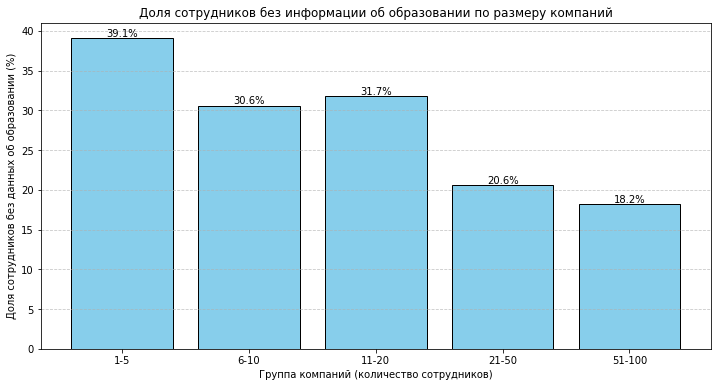

In [37]:
# строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
bars = plt.bar(
    education_coverage['size_group'],
    education_coverage['missing_education_pct'],
    color='skyblue',
    edgecolor='black'
)

plt.title('Доля сотрудников без информации об образовании по размеру компаний')
plt.xlabel('Группа компаний (количество сотрудников)')
plt.ylabel('Доля сотрудников без данных об образовании (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.show()

Группы подобраны на основе распределения компаний по количеству сотрудников. Чем крупнее компания тем меньше доля тех работников у которых нет информации об образовании.
Объединить возможно и таблицу degrees.csv, также по столбцу id работника.

`network_username` встречается три раза в разных таблицах, в company_and_rounds.csv, people.csv и fund.csv. Данный столбец нельзя использовать для объединения данных, так как в разных таблицах этот столбец обозначает разные переменные, такие как ник компании в соцсетях, ник сотрудника в соцсетях и ник финансового фонда в соцсетях. А если я ошибочно принимаю `network_username` в таблице people.csv за ник сотрудника, то соединение возможно, но не нужно, ведь есть уже проверенный столбец company_id.



### 2.4. Проблемный датасет и причина возникновения пропусков



In [38]:
# Анализ структуры данных
print("Информация о датасете:")
print(company_and_rounds.info())
print("\nКоличество пропущенных значений:")
print(company_and_rounds.isnull().sum().sort_values(ascending=False))

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64    

In [39]:
# Создаем датасет с уникальной информацией о компаниях
companies = company_and_rounds[[
    'company_id', 'name', 'category_code', 'status', 
    'founded_at', 'closed_at', 'domain', 'network_username',
    'country_code', 'investment_rounds', 'funding_rounds', 
    'funding_total', 'milestones'
]].drop_duplicates(subset=['company_id'])

# Создаем датасет с информацией о раундах финансирования
rounds = company_and_rounds[[
    'funding_round_id', 'company_identifier', 'funded_at', 
    'funding_round_type', 'raised_amount', 'pre_money_valuation',
    'participants', 'is_first_round', 'is_last_round'
]].copy()

# Удаляем строки, где полностью отсутствует информация о раунде
rounds = rounds.dropna(
    subset=['funded_at', 'funding_round_type', 'raised_amount'],
    how='all'
)
# Приведение к нормальным типам
# Для датасета компаний
companies['company_id'] = companies['company_id'].astype('string')

# Для датасета раундов
rounds['funding_round_id'] = rounds['funding_round_id'].astype('string')
rounds['company_identifier'] = rounds['company_identifier'].astype('string')
# Удаляем дублирующиеся столбцы
companies = companies.loc[:, ~companies.columns.duplicated()]
rounds = rounds.loc[:, ~rounds.columns.duplicated()]
print("Информация о компаниях:")
print(companies.info())
print("Информация о раундах финансирования:")
print(rounds.info())

Информация о компаниях:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  string        
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2)

In [40]:
# Сортировка и сброс индекса для компаний
companies = companies.sort_values('company_id').reset_index(drop=True)

# Сортировка и сброс индекса для раундов
rounds = rounds.sort_values(['company_identifier', 'funded_at']).reset_index(drop=True)

In [41]:
companies.head(10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
5,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,0.0,0.0,0.0
6,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,0.0,0.0,0.0
7,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,0.0,0.0,1.0
8,10005.0,Thomas Publishing,advertising,operating,NaT,NaT,thomaspublishing.com,NaN,USA,0.0,0.0,0.0,1.0
9,100062.0,Vetter Idea Management System,enterprise,operating,2011-08-01,NaT,getvetter.com,getvetter,NaN,0.0,0.0,0.0,1.0


In [42]:
rounds.head(10)

,funding_round_id,company_identifier,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0
4,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0
5,3619.0,10015.0,2008-10-10,series-a,2000000.0,0.0,2.0,0.0,1.0
6,18213.0,10015.0,2010-09-10,series-b,9000000.0,0.0,4.0,0.0,0.0
7,54006.0,10015.0,2012-01-01,venture,2069200.0,0.0,4.0,0.0,0.0
8,27747.0,10015.0,2012-01-24,series-c+,12000000.0,0.0,4.0,0.0,0.0
9,45409.0,10015.0,2013-08-13,series-c+,43000000.0,0.0,5.0,1.0,0.0



##  Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных



In [43]:
# Отфильтруем обработанный датафрейм
filtered_companies = companies[
    ((companies['status'] == 'acquired') | 
     ((companies['funding_rounds'] > 0) | 
      (companies['investment_rounds'] > 0)))
]
filtered_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  string        
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(6), string(1)
memor

In [44]:
filtered_companies.head(10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
19,10015.0,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,68069200.0,0.0
20,100155.0,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0.0,3.0,10125300.0,1.0
24,10018.0,Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0.0,3.0,33000000.0,3.0
26,100189.0,Locatrix Communications,mobile,operating,2003-11-01,NaT,locatrix.com,NaN,AUS,0.0,1.0,250000.0,1.0
27,10020.0,Threebrix E-services Pvt Ltd,NaN,operating,NaT,NaT,NaN,NaN,NaN,1.0,0.0,0.0,0.0


In [45]:
filtered_companies.isna().sum() # Считаем количество пропусков в данной таблице

company_id               0
name                     0
category_code         5432
status                   0
founded_at           12940
closed_at            38619
domain                4993
network_username     19897
country_code          6005
investment_rounds        0
funding_rounds           0
funding_total            0
milestones               0
dtype: int64

In [46]:
filtered_companies.isna().mean()

company_id           0.000000
name                 0.000000
category_code        0.133310
status               0.000000
founded_at           0.317569
closed_at            0.947775
domain               0.122537
network_username     0.488306
country_code         0.147373
investment_rounds    0.000000
funding_rounds       0.000000
funding_total        0.000000
milestones           0.000000
dtype: float64

In [47]:
# Проверяем явные дубликаты в датафрейме 
filtered_companies.duplicated().sum()

0

In [48]:
# Проверяем неявные дубликаты в датафрейме 
filtered_companies.duplicated(subset='company_id').sum()

0

Данные в порядке за исключением пропусков но их большую часть можно объяснить, например в столбце `closed_at` пропуски означают, что компания не закрылась, пропуски в столбце `network_username` могут означать маленькие компании которые не регистрировались в соцсетях и не имеют ников, в столбце `founded_at` может означать что она не зарегистрирована официально например как стартап предложение, `category_code` неопределились с категорией. Также все пропуски могут быть ошибками при внесении данных.


### 3.2. Анализ выбросов



In [49]:
filtered_companies['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

Обычные способы нахождения типичных значений (особенно среднее арифметическое) неприменимы для таких асимметричных данных с выбросами. Медиана и перцентили дают более объективную картину. Для глубокого анализа стоит: исключить/отдельно проанализировать нулевые значения, так как 25 процентов компаний имеют нулевое финансирование.

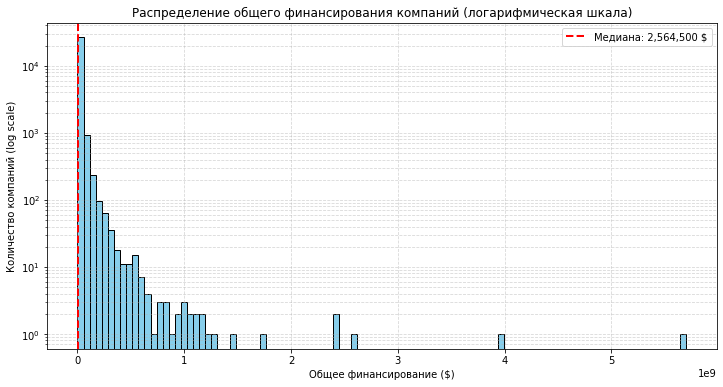

In [50]:
# Фильтрация положительных значений
positive_funding = filtered_companies[filtered_companies['funding_total'] > 0]['funding_total']
# Гистограмма распределения финансирования
plt.figure(figsize=(12, 6))
plt.hist(positive_funding, bins=100, log=True, color='skyblue', edgecolor='black')
median_val = positive_funding.median()
plt.axvline(x=median_val, 
            color='red', 
            linestyle='--', 
            linewidth=2,
            label=f'Медиана: {median_val:,.0f} $')
plt.title('Распределение общего финансирования компаний (логарифмическая шкала)')
plt.xlabel('Общее финансирование ($)')
plt.ylabel('Количество компаний (log scale)')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

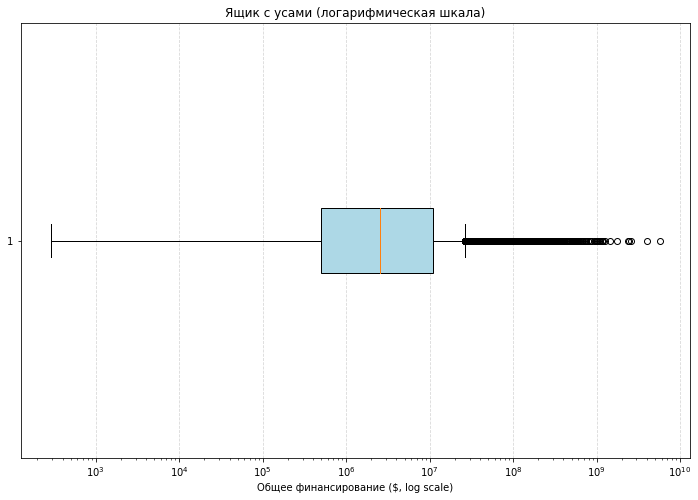

In [51]:
# ящик с усами для выявления выбросов
plt.figure(figsize=(12, 8))
plt.boxplot(positive_funding, vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           flierprops=dict(marker='o', markersize=6))
plt.xscale('log')
plt.title('Ящик с усами (логарифмическая шкала)')
plt.xlabel('Общее финансирование ($, log scale)')
plt.grid(True, axis='x', ls="--", alpha=0.5)
plt.show()

Очень много выбросов и очень много нулевых значений.


### 3.3. Куплены забесплатно?



In [52]:
# Соединяем два датафрейма по соответствующим столбцам acquired_company_id и company_id
company_zero_amount = pd.merge(
    filtered_companies,
    acquisition,
    left_on='company_id', 
    right_on='acquired_company_id',
    how='left'  # тип соединения
)
company_zero_amount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 40746
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40747 non-null  object        
 1   name                  40747 non-null  object        
 2   category_code         35315 non-null  object        
 3   status                40747 non-null  object        
 4   founded_at            27807 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35754 non-null  object        
 7   network_username      20850 non-null  object        
 8   country_code          34742 non-null  object        
 9   investment_rounds     40747 non-null  float64       
 10  funding_rounds        40747 non-null  float64       
 11  funding_total         40747 non-null  float64       
 12  milestones            40747 non-null  float64       
 13  id              

In [53]:
#  Сортируем проданные стартапы за 0 иза 1 доллар у которых не нулевое финансирование
company_zero_amount = company_zero_amount[
    (company_zero_amount['price_amount'] == 0) | 
     ((company_zero_amount['price_amount'] == 1) & 
      (company_zero_amount['funding_total'] > 0))]

In [54]:
company_zero_amount.head(10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at


In [55]:
# Фильтрация данных
positive_funding = filtered_companies[
    (filtered_companies['funding_total'] > 0) & 
    (filtered_companies['funding_total'].notna())
]['funding_total']

# Квартили и IQR
Q1 = positive_funding.quantile(0.25)  # 25-й процентиль
Q3 = positive_funding.quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [56]:
# Вычисление процентилей для границ
percentile_lower = np.mean(positive_funding <= lower_bound) * 100
percentile_upper = 100 - np.mean(positive_funding <= upper_bound) * 100

print(f"Нижняя граница выбросов: {lower_bound:,.0f}$ (~{percentile_lower:.2f}% данных ниже)")
print(f"Верхняя граница выбросов: {upper_bound:,.0f}$ (~{percentile_upper:.2f}% данных выше)")

Нижняя граница выбросов: -15,250,000$ (~0.00% данных ниже)
Верхняя граница выбросов: 26,750,000$ (~12.44% данных выше)


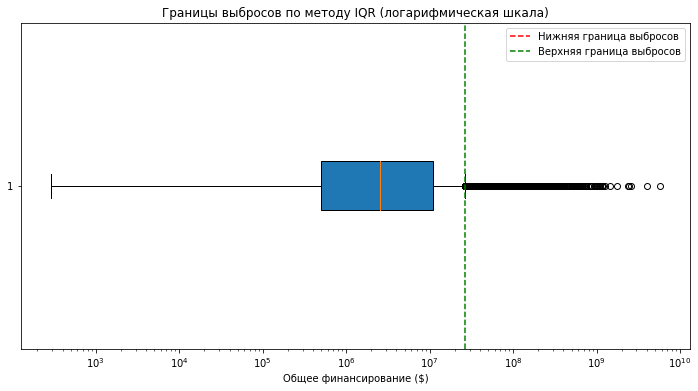

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.boxplot(positive_funding, vert=False, patch_artist=True)
plt.axvline(lower_bound, color='r', linestyle='--', label='Нижняя граница выбросов')
plt.axvline(upper_bound, color='g', linestyle='--', label='Верхняя граница выбросов')
plt.xscale('log')
plt.title('Границы выбросов по методу IQR (логарифмическая шкала)')
plt.xlabel('Общее финансирование ($)')
plt.legend()
plt.show()

Из прошлой задачи видно что в столбце множество нулевых значений , но они не являются выбросами , выбросами являются огромные значения после 87 процентиля по верхней границе , а по нижней гаранице их нет.


### 3.4. Цены стартапов по категориям



In [58]:
# Соединяем два датафрейма по соответствующим столбцам acquired_company_id и company_id
company_zero_amount = pd.merge(
    filtered_companies,
    acquisition,
    left_on='company_id', 
    right_on='acquired_company_id',
    how='left'  # тип соединения
)
company_zero_amount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 40746
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40747 non-null  object        
 1   name                  40747 non-null  object        
 2   category_code         35315 non-null  object        
 3   status                40747 non-null  object        
 4   founded_at            27807 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35754 non-null  object        
 7   network_username      20850 non-null  object        
 8   country_code          34742 non-null  object        
 9   investment_rounds     40747 non-null  float64       
 10  funding_rounds        40747 non-null  float64       
 11  funding_total         40747 non-null  float64       
 12  milestones            40747 non-null  float64       
 13  id              

In [59]:
company_zero_amount['category_code'] = company_zero_amount['category_code'].fillna('none')
grouped_describe = company_zero_amount.groupby('category_code')['funding_total']

aggs = ['sum','count','mean','median','max','std','var']
dic_grouped_describe = {}

for agg in aggs:
  result = grouped_describe.agg(agg)
  result.name = agg
  dic_grouped_describe[agg] = result

grouped_describe = pd.DataFrame(dic_grouped_describe)
grouped_describe.head(10)

,sum,count,mean,median,max,std,var
category_code,,,,,,,
advertising,1.248819e+10,1436,8.696509e+06,1000000.0,2.738340e+08,2.125720e+07,4.518686e+14
analytics,6.698312e+09,701,9.555366e+06,2000000.0,6.050080e+08,2.893465e+07,8.372140e+14
automotive,3.594221e+09,89,4.038450e+07,1300000.0,1.451000e+09,1.832047e+08,3.356394e+16
biotech,6.686869e+10,3597,1.859013e+07,4000000.0,2.400000e+09,5.465791e+07,2.987487e+15
cleantech,3.867019e+10,1145,3.377310e+07,6000000.0,1.200000e+09,9.215550e+07,8.492637e+15
consulting,2.616850e+09,503,5.202485e+06,50000.0,1.000000e+08,1.375791e+07,1.892801e+14
design,1.863784e+08,60,3.106306e+06,322745.0,5.850000e+07,8.862027e+06,7.853552e+13
ecommerce,1.762815e+10,1831,9.627610e+06,486000.0,1.100000e+09,4.757703e+07,2.263574e+15
education,3.948519e+09,560,7.050926e+06,570000.0,7.500000e+08,3.660939e+07,1.340247e+15


In [60]:
# Сортировка по среднему значению
high_mean = grouped_describe.sort_values('mean', ascending=False).head(10)
print("Категории с самыми высокими средними ценами:")
print(high_mean['mean'])

Категории с самыми высокими средними ценами:
category_code
automotive         4.038450e+07
nanotech           3.600484e+07
cleantech          3.377310e+07
semiconductor      2.023868e+07
network_hosting    1.948691e+07
medical            1.882670e+07
biotech            1.859013e+07
transportation     1.705463e+07
manufacturing      1.505377e+07
government         1.452844e+07
Name: mean, dtype: float64


In [61]:
# Сортировка по медиане
high_median = grouped_describe.sort_values('median', ascending=False).head(10)
print("Категории с самой высокой медианой цены:")
print(high_median['median'])

Категории с самой высокой медианой цены:
category_code
semiconductor      8100000.0
cleantech          6000000.0
medical            5400000.0
nanotech           5115960.0
biotech            4000000.0
security           2024640.0
analytics          2000000.0
network_hosting    2000000.0
manufacturing      1895040.0
enterprise         1617100.0
Name: median, dtype: float64


In [62]:
# Сортировка по стандартному отклонению (разброс цен)
high_std = grouped_describe.sort_values('std', ascending=False).head(10)
print("\nКатегории с наибольшим разбросом цен:")
print(high_std['std'])


Категории с наибольшим разбросом цен:
category_code
automotive          1.832047e+08
mobile              1.459792e+08
social              1.114758e+08
health              1.050341e+08
nanotech            9.596109e+07
manufacturing       9.304530e+07
cleantech           9.215550e+07
network_hosting     6.288838e+07
public_relations    5.840271e+07
biotech             5.465791e+07
Name: std, dtype: float64


**Категории с высокими ценами:**

- cleantech (среднее: 33.8 млн, медиана: 6 млн)

- nanotech (среднее: 36 млн, медиана: 5.1 млн)

- automotive (среднее: 40.4 млн)

**Категории с наибольшим разбросом цен:**

- automotive (стандартное отклонение: 183 млн)
- mobile (стандартное отклонение: 146 млн)
- social (стандартное отклонение: 111.4 млн)


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [63]:
# расчет типичных значений раундов для каждого возможного статуса стартапа
status_stats = filtered_companies.groupby('status')['funding_rounds'].agg(
    ['mean', 'median', 'min', 'max']
).sort_values('median', ascending=False)
print(status_stats)

               mean  median  min   max
status                                
closed     1.381453     1.0  0.0   8.0
ipo        1.934375     1.0  0.0  13.0
operating  1.522658     1.0  0.0  15.0
acquired   0.523526     0.0  0.0  12.0


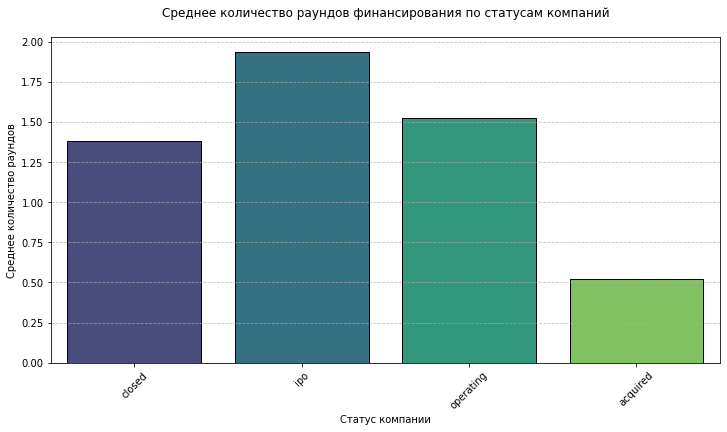

In [64]:
plt.figure(figsize=(12, 6))

# Основной график средних значений
ax = sns.barplot(
    x=status_stats.index,
    y='mean',
    data=status_stats.reset_index(),
    palette='viridis',
    edgecolor='black'
)
# Настройки оформления
plt.title('Среднее количество раундов финансирования по статусам компаний', pad=20)
plt.xlabel('Статус компании')
plt.ylabel('Среднее количество раундов')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

у IPO самый высокий показатель средних раундов(почти 2), а самый маленький показатель раундов у acquired (всего лишь 0,5).


##  Итоговый вывод и рекомендации



Провели предобработку данных , сделали исследование раундов финансирования по годам (Самое большое типичное финансирование на один раунд было в 2005 году и составляло 5500000. В 2013 году наблюдалась тенденция увеличения количества раундов и уменьшение типичного финансирования за раунд.), исследовали зависимость размера компании от полноты данных об оброзовании работников(Чем крупнее компания тем меньше доля тех работников у которых нет информации об образовании. ), исследовали проблемный датасет на пропуски, отфильтровали и проверили таблицу с информацией о компаниях, проанализировали выбросы, исследовали компании которые были продананы за 0 или 1 доллар, исследовали цены стартапов по категориям, исследовали сколько раундов стартап продержится перед покупкой, расчитали аналитически верхнюю и нижнюю границу выбросов в процентилях. Среди категорий стартапов выделили категории стартапов, характеризующиеся типично высокими ценами и наибольшим разбросом цен за стартап.
